<a href="https://colab.research.google.com/github/gabrielfernandorey/GGGR/blob/main/Arboles/SRT%20v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SRT v4 - Ensayo
### Arboles de regresion - Nuevo Dataset

In [1]:
import random
import string
import pandas as pd
import numpy as np
from datetime import date

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


### Importamos Datos

In [2]:
!wget https://raw.githubusercontent.com/gabrielfernandorey/GGGR/main/Regresion%20lineal/serie_acc_SRT.csv

--2023-05-07 13:56:22--  https://raw.githubusercontent.com/gabrielfernandorey/GGGR/main/Regresion%20lineal/serie_acc_SRT.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26984867 (26M) [text/plain]
Saving to: ‘serie_acc_SRT.csv’

serie_acc_SRT.csv   100%[===================>]  25.73M   138MB/s    in 0.2s    

2023-05-07 13:56:23 (138 MB/s) - ‘serie_acc_SRT.csv’ saved [26984867/26984867]



In [3]:
df = pd.read_csv('/content/serie_acc_SRT.csv', header=0, sep=';',
                 names=['año','mes','codigo','total_cp'],
                 dtype={'año': str, 'mes': str, 'codigo': str, 'total_cp': str})

In [4]:
column_order = ['codigo', 'año', 'mes', 'total_cp']
new_df = df.reindex(columns=column_order)
df = new_df.copy()

In [5]:
df

,codigo,año,mes,total_cp
0,01657000,1995,1,1
1,08300000,1995,7,1
2,01900000,1995,9,1
3,01900000,1995,11,1
4,01650000,1996,3,1
...,...,...,...,...
1470273,05582000,2023,5,1
1470274,01754000,2023,5,7
1470275,03503000,2023,5,3
1470276,X5000FJA,2023,5,1


### EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470278 entries, 0 to 1470277
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   codigo    1469958 non-null  object
 1   año       1470278 non-null  object
 2   mes       1470278 non-null  object
 3   total_cp  1470278 non-null  object
dtypes: object(4)
memory usage: 44.9+ MB


#### Ajustamos tipo de datos

In [7]:
df['año'] = pd.to_numeric(df['año'], downcast='integer') #corregimos el formato de la columna 

In [8]:
df['mes'] = pd.to_numeric(df['mes']) #corregimos el formato de la columna 

In [9]:
df['total_cp'] = pd.to_numeric(df['total_cp']) #corregimos el formato de la columna 

In [10]:
df.dtypes

codigo      object
año          int16
mes          int64
total_cp     int64
dtype: object

In [11]:
df.head()

,codigo,año,mes,total_cp
0,01657000,1995,1,1
1,08300000,1995,7,1
2,01900000,1995,9,1
3,01900000,1995,11,1
4,01650000,1996,3,1


### Eliminamos NaN

In [12]:
df = df.dropna(subset=['codigo'])
df

,codigo,año,mes,total_cp
0,01657000,1995,1,1
1,08300000,1995,7,1
2,01900000,1995,9,1
3,01900000,1995,11,1
4,01650000,1996,3,1
...,...,...,...,...
1470273,05582000,2023,5,1
1470274,01754000,2023,5,7
1470275,03503000,2023,5,3
1470276,X5000FJA,2023,5,1


In [13]:
df = df.sort_values(['año','mes'], ascending=True)
df

,codigo,año,mes,total_cp
0,01657000,1995,1,1
1,08300000,1995,7,1
2,01900000,1995,9,1
3,01900000,1995,11,1
4,01650000,1996,3,1
...,...,...,...,...
1470273,05582000,2023,5,1
1470274,01754000,2023,5,7
1470275,03503000,2023,5,3
1470276,X5000FJA,2023,5,1


In [14]:
# Verificar cuantos registros tienen el codpos mayor a 8 caracteres
df_codigo = df.loc[df['codigo'].apply(lambda x: len(str(x)) > 8)]
df_codigo

,codigo,año,mes,total_cp


In [15]:
# Verificar cuantos registros tienen el codpos menor a 4 caracteres
df_codigo = df.loc[df['codigo'].apply(lambda x: len(str(x)) < 4)]
df_codigo

,codigo,año,mes,total_cp


### Convertimos el codigo postal a 4 caracteres

In [16]:
df.codigo = df['codigo'].str.slice(start=1, stop=5)
df

,codigo,año,mes,total_cp
0,1657,1995,1,1
1,8300,1995,7,1
2,1900,1995,9,1
3,1900,1995,11,1
4,1650,1996,3,1
...,...,...,...,...
1470273,5582,2023,5,1
1470274,1754,2023,5,7
1470275,3503,2023,5,3
1470276,5000,2023,5,1


#### Verificamos cantidad de registros por codigo

In [17]:
# codigos unicos
contador = df['codigo'].value_counts()
contador

5000    21916
2000    18100
4000    13459
5500    12482
1425    12020
        ...  
4361        1
6412        1
4677        1
5884        1
3033        1
Name: codigo, Length: 3355, dtype: int64

### Conservamos al menos 12 meses por codigo

In [18]:
mayores_a_12_datos = contador[contador > 12]

In [19]:
len(mayores_a_12_datos)

2610

In [20]:
df = df[df['codigo'].isin(mayores_a_12_datos.index)]

In [21]:
df

,codigo,año,mes,total_cp
0,1657,1995,1,1
1,8300,1995,7,1
2,1900,1995,9,1
3,1900,1995,11,1
4,1650,1996,3,1
...,...,...,...,...
1470273,5582,2023,5,1
1470274,1754,2023,5,7
1470275,3503,2023,5,3
1470276,5000,2023,5,1


### Eliminamos códigos no válidos

In [22]:
df = df.loc[df.codigo != "    "]

In [23]:
df = df.loc[df.codigo != "   0"]

In [24]:
df = df.loc[df.codigo != "0000"]

In [25]:
df = df.loc[df.codigo != "0001"]

In [26]:
df = df.loc[df.codigo != "0005"]

### Transformacion

#### LabelEncoder

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
# Crear una instancia de OneHotEncoder
encoder = LabelEncoder()

In [29]:
# Codificar los valores alfanuméricos
X_encoded = encoder.fit_transform(df.codigo.values.reshape(-1,))

In [30]:
X_encoded.shape

(1466626,)

#### Embeddings

In [31]:
tamano_embedding = 50

In [32]:
matriz_embedding = np.random.rand(len(encoder.classes_), tamano_embedding)

In [33]:
matriz_embedding

array([[0.092436  , 0.87224646, 0.39432356, ..., 0.34435847, 0.77656933,
        0.21950576],
       [0.09299847, 0.0793374 , 0.24640707, ..., 0.55089542, 0.85288667,
        0.27995174],
       [0.46483712, 0.25919623, 0.81662419, ..., 0.15089519, 0.21994039,
        0.43500846],
       ...,
       [0.40525809, 0.97331108, 0.86915546, ..., 0.88626826, 0.42239904,
        0.79378561],
       [0.15536863, 0.71891949, 0.33271303, ..., 0.90767537, 0.33584775,
        0.33964888],
       [0.03488355, 0.58344814, 0.95037681, ..., 0.01040414, 0.83528864,
        0.83721255]])

In [34]:
encoder.classes_

array(['1000', '1001', '1002', ..., '9412', '9420', '9999'], dtype=object)

In [35]:
# Vectores de embeddings asociados a un valor por cada atributo
atributos_embeddings = matriz_embedding[X_encoded]

In [36]:
atributos_embeddings.shape

(1466626, 50)

#### Verificacion embeddings

In [37]:
i = 0
encoder.classes_[i]

'1000'

In [38]:
matriz_embedding[i]

array([0.092436  , 0.87224646, 0.39432356, 0.41211435, 0.97575997,
       0.88279221, 0.95516294, 0.2587933 , 0.87356331, 0.76027499,
       0.10141693, 0.82708948, 0.17269554, 0.1624736 , 0.24689078,
       0.71015516, 0.98583914, 0.95656817, 0.45918288, 0.32332273,
       0.22805355, 0.45192015, 0.66810512, 0.76880429, 0.12343568,
       0.18619017, 0.96825884, 0.13570573, 0.62311952, 0.72202781,
       0.02075711, 0.18309863, 0.61816922, 0.69857294, 0.99331643,
       0.94878312, 0.65518053, 0.17406512, 0.90495229, 0.06951435,
       0.21827803, 0.21192546, 0.31972229, 0.31248533, 0.56911813,
       0.81235983, 0.44857264, 0.34435847, 0.77656933, 0.21950576])

In [39]:
matriz_embedding.shape

(2605, 50)

#### Dataframe con datos de embeddings

In [40]:
# Creamos un nuevo dataframe con los valores del embedding
embedding_df = pd.DataFrame(matriz_embedding, columns=[f'emb_{i}' for i in range(matriz_embedding.shape[1])])

In [41]:
embedding_df

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,...,emb_40,emb_41,emb_42,emb_43,emb_44,emb_45,emb_46,emb_47,emb_48,emb_49
0,0.092436,0.872246,0.394324,0.412114,0.975760,0.882792,0.955163,0.258793,0.873563,0.760275,...,0.218278,0.211925,0.319722,0.312485,0.569118,0.812360,0.448573,0.344358,0.776569,0.219506
1,0.092998,0.079337,0.246407,0.444522,0.720324,0.209460,0.829431,0.382732,0.700930,0.824700,...,0.398913,0.317023,0.113964,0.640076,0.096754,0.036524,0.144253,0.550895,0.852887,0.279952
2,0.464837,0.259196,0.816624,0.761680,0.825441,0.660373,0.136880,0.662512,0.959646,0.449791,...,0.668104,0.103597,0.815944,0.173545,0.016186,0.063274,0.788860,0.150895,0.219940,0.435008
3,0.414960,0.308347,0.227528,0.905416,0.303402,0.173225,0.166050,0.323275,0.919731,0.156150,...,0.110257,0.313015,0.056700,0.496455,0.139387,0.805705,0.785891,0.292119,0.980044,0.136530
4,0.522168,0.410222,0.398534,0.763659,0.413428,0.914661,0.033825,0.440214,0.754046,0.965795,...,0.258332,0.522711,0.918471,0.110374,0.709602,0.754700,0.375164,0.961733,0.957189,0.627485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2600,0.411136,0.632029,0.230283,0.115938,0.781398,0.846270,0.231488,0.864852,0.101511,0.897209,...,0.476663,0.218527,0.509173,0.054997,0.090083,0.558399,0.468696,0.033795,0.294463,0.693575
2601,0.922042,0.073668,0.795970,0.595918,0.706806,0.653330,0.979189,0.995586,0.949940,0.405124,...,0.517799,0.273732,0.617904,0.809520,0.264176,0.354306,0.674508,0.243610,0.796941,0.382186
2602,0.405258,0.973311,0.869155,0.614618,0.390842,0.651362,0.869395,0.896586,0.637811,0.307165,...,0.919044,0.411307,0.103129,0.706760,0.983401,0.083458,0.766334,0.886268,0.422399,0.793786
2603,0.155369,0.718919,0.332713,0.083829,0.080150,0.809918,0.249647,0.364300,0.783436,0.996098,...,0.200724,0.051948,0.271647,0.219259,0.351606,0.270242,0.262509,0.907675,0.335848,0.339649


In [42]:
embedding_df['codigo'] = encoder.classes_

In [43]:
# Utilizamos el codigo como indice (para joinear)
embedding_df = embedding_df.set_index('codigo')
embedding_df

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,...,emb_40,emb_41,emb_42,emb_43,emb_44,emb_45,emb_46,emb_47,emb_48,emb_49
codigo,,,,,,,,,,,,,,,,,,,,,
1000,0.092436,0.872246,0.394324,0.412114,0.975760,0.882792,0.955163,0.258793,0.873563,0.760275,...,0.218278,0.211925,0.319722,0.312485,0.569118,0.812360,0.448573,0.344358,0.776569,0.219506
1001,0.092998,0.079337,0.246407,0.444522,0.720324,0.209460,0.829431,0.382732,0.700930,0.824700,...,0.398913,0.317023,0.113964,0.640076,0.096754,0.036524,0.144253,0.550895,0.852887,0.279952
1002,0.464837,0.259196,0.816624,0.761680,0.825441,0.660373,0.136880,0.662512,0.959646,0.449791,...,0.668104,0.103597,0.815944,0.173545,0.016186,0.063274,0.788860,0.150895,0.219940,0.435008
1003,0.414960,0.308347,0.227528,0.905416,0.303402,0.173225,0.166050,0.323275,0.919731,0.156150,...,0.110257,0.313015,0.056700,0.496455,0.139387,0.805705,0.785891,0.292119,0.980044,0.136530
1004,0.522168,0.410222,0.398534,0.763659,0.413428,0.914661,0.033825,0.440214,0.754046,0.965795,...,0.258332,0.522711,0.918471,0.110374,0.709602,0.754700,0.375164,0.961733,0.957189,0.627485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9408,0.411136,0.632029,0.230283,0.115938,0.781398,0.846270,0.231488,0.864852,0.101511,0.897209,...,0.476663,0.218527,0.509173,0.054997,0.090083,0.558399,0.468696,0.033795,0.294463,0.693575
9410,0.922042,0.073668,0.795970,0.595918,0.706806,0.653330,0.979189,0.995586,0.949940,0.405124,...,0.517799,0.273732,0.617904,0.809520,0.264176,0.354306,0.674508,0.243610,0.796941,0.382186
9412,0.405258,0.973311,0.869155,0.614618,0.390842,0.651362,0.869395,0.896586,0.637811,0.307165,...,0.919044,0.411307,0.103129,0.706760,0.983401,0.083458,0.766334,0.886268,0.422399,0.793786


In [44]:
# Utilizamos el codigo como indice (para joinear)
df = df.set_index('codigo')
df

,año,mes,total_cp
codigo,,,
1657,1995,1,1
8300,1995,7,1
1900,1995,9,1
1900,1995,11,1
1650,1996,3,1
...,...,...,...
5582,2023,5,1
1754,2023,5,7
3503,2023,5,3


In [45]:
df.total_cp.max()

5313

### Transformar la variable de salida

In [46]:
mmscaler = MinMaxScaler()

In [47]:
df['total_cp'] = mmscaler.fit_transform(df['total_cp'].values.reshape(-1,1))

In [48]:
df.head()

,año,mes,total_cp
codigo,,,
1657,1995,1,0.0
8300,1995,7,0.0
1900,1995,9,0.0
1900,1995,11,0.0
1650,1996,3,0.0


#### Joins de Dataframes

In [49]:
df_join = embedding_df.join(df, lsuffix='_izq', rsuffix='_der')
df_join

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,...,emb_43,emb_44,emb_45,emb_46,emb_47,emb_48,emb_49,año,mes,total_cp
codigo,,,,,,,,,,,,,,,,,,,,,
1000,0.092436,0.872246,0.394324,0.412114,0.975760,0.882792,0.955163,0.258793,0.873563,0.760275,...,0.312485,0.569118,0.812360,0.448573,0.344358,0.776569,0.219506,1996,12,0.000000
1000,0.092436,0.872246,0.394324,0.412114,0.975760,0.882792,0.955163,0.258793,0.873563,0.760275,...,0.312485,0.569118,0.812360,0.448573,0.344358,0.776569,0.219506,1997,10,0.000188
1000,0.092436,0.872246,0.394324,0.412114,0.975760,0.882792,0.955163,0.258793,0.873563,0.760275,...,0.312485,0.569118,0.812360,0.448573,0.344358,0.776569,0.219506,1997,11,0.000000
1000,0.092436,0.872246,0.394324,0.412114,0.975760,0.882792,0.955163,0.258793,0.873563,0.760275,...,0.312485,0.569118,0.812360,0.448573,0.344358,0.776569,0.219506,1998,2,0.000941
1000,0.092436,0.872246,0.394324,0.412114,0.975760,0.882792,0.955163,0.258793,0.873563,0.760275,...,0.312485,0.569118,0.812360,0.448573,0.344358,0.776569,0.219506,1998,9,0.000188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,0.034884,0.583448,0.950377,0.752458,0.987339,0.757134,0.099832,0.340590,0.029210,0.802007,...,0.997311,0.360236,0.889646,0.817589,0.010404,0.835289,0.837213,2013,7,0.000188
9999,0.034884,0.583448,0.950377,0.752458,0.987339,0.757134,0.099832,0.340590,0.029210,0.802007,...,0.997311,0.360236,0.889646,0.817589,0.010404,0.835289,0.837213,2013,8,0.000188
9999,0.034884,0.583448,0.950377,0.752458,0.987339,0.757134,0.099832,0.340590,0.029210,0.802007,...,0.997311,0.360236,0.889646,0.817589,0.010404,0.835289,0.837213,2013,9,0.000188


#### Datos de entrenamiento

In [50]:
df_final = df_join.reset_index()
df_final

,codigo,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,...,emb_43,emb_44,emb_45,emb_46,emb_47,emb_48,emb_49,año,mes,total_cp
0,1000,0.092436,0.872246,0.394324,0.412114,0.975760,0.882792,0.955163,0.258793,0.873563,...,0.312485,0.569118,0.812360,0.448573,0.344358,0.776569,0.219506,1996,12,0.000000
1,1000,0.092436,0.872246,0.394324,0.412114,0.975760,0.882792,0.955163,0.258793,0.873563,...,0.312485,0.569118,0.812360,0.448573,0.344358,0.776569,0.219506,1997,10,0.000188
2,1000,0.092436,0.872246,0.394324,0.412114,0.975760,0.882792,0.955163,0.258793,0.873563,...,0.312485,0.569118,0.812360,0.448573,0.344358,0.776569,0.219506,1997,11,0.000000
3,1000,0.092436,0.872246,0.394324,0.412114,0.975760,0.882792,0.955163,0.258793,0.873563,...,0.312485,0.569118,0.812360,0.448573,0.344358,0.776569,0.219506,1998,2,0.000941
4,1000,0.092436,0.872246,0.394324,0.412114,0.975760,0.882792,0.955163,0.258793,0.873563,...,0.312485,0.569118,0.812360,0.448573,0.344358,0.776569,0.219506,1998,9,0.000188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466621,9999,0.034884,0.583448,0.950377,0.752458,0.987339,0.757134,0.099832,0.340590,0.029210,...,0.997311,0.360236,0.889646,0.817589,0.010404,0.835289,0.837213,2013,7,0.000188
1466622,9999,0.034884,0.583448,0.950377,0.752458,0.987339,0.757134,0.099832,0.340590,0.029210,...,0.997311,0.360236,0.889646,0.817589,0.010404,0.835289,0.837213,2013,8,0.000188
1466623,9999,0.034884,0.583448,0.950377,0.752458,0.987339,0.757134,0.099832,0.340590,0.029210,...,0.997311,0.360236,0.889646,0.817589,0.010404,0.835289,0.837213,2013,9,0.000188
1466624,9999,0.034884,0.583448,0.950377,0.752458,0.987339,0.757134,0.099832,0.340590,0.029210,...,0.997311,0.360236,0.889646,0.817589,0.010404,0.835289,0.837213,2013,12,0.000000


In [51]:
X_data = df_final.drop(['codigo','total_cp'], axis=1).to_numpy()

In [52]:
X_data.shape

(1466626, 52)

In [53]:
y_data = df_final['total_cp'].to_numpy()

In [54]:
y_data

array([0.        , 0.00018825, 0.        , ..., 0.00018825, 0.        ,
       0.        ])

In [55]:
X_train, X_test, y_train, y_test = train_test_split( X_data, y_data, test_size=0.30, random_state=43) 

### Modelo

In [56]:
regr_2 = DecisionTreeRegressor(max_depth=5, min_samples_split=3, min_samples_leaf=3)
regr_3 = RandomForestRegressor(max_depth=5, min_samples_split=3, min_samples_leaf=3)
regr_4 = ExtraTreesRegressor(max_depth=5, min_samples_split=3, min_samples_leaf=3)

### Entrenamiento

In [69]:
#regr_2.fit(X_train, y_train)
#regr_3.fit(X_train, y_train)
regr_4.fit(X_train, y_train)

ExtraTreesRegressor(max_depth=5, min_samples_leaf=3, min_samples_split=3)

### Validacion

##### DecisionTreeRegressor

In [64]:
pred_2_train = regr_2.predict(X_train)
pred_2_test = regr_2.predict(X_test)

In [65]:
mse_2_train = mean_squared_error(y_train, pred_2_train)
mse_2_test  = mean_squared_error(y_test, pred_2_test)

In [66]:
mse_2_train, mse_2_test

(6.493767305761842e-05, 6.728227249911995e-05)

In [67]:
rmse_2_train = np.sqrt(mse_2_train)
rmse_2_test  = np.sqrt(mse_2_test)
print('RMSE:', round(rmse_2_train,4), round(rmse_2_test,4))

RMSE: 0.0081 0.0082


In [68]:
score_2 = r2_score(y_test, pred_2_test)
print(f'R2 score: {score_2:.5f}')

R2 score: 0.00780


##### RandomForestRegressor(max_depth=5)

In [58]:
pred_3_train = regr_3.predict(X_train)
pred_3_test = regr_3.predict(X_test)

In [59]:
mse_3_train = mean_squared_error(y_train, pred_3_train)
mse_3_test  = mean_squared_error(y_test, pred_3_test)

In [60]:
mse_3_train, mse_3_test

(6.479030580704011e-05, 6.715265537732565e-05)

In [61]:
rmse_3_train = np.sqrt(mse_3_train)
rmse_3_test  = np.sqrt(mse_3_test)
print('RMSE:', round(rmse_3_train,4), round(rmse_3_test,4))

RMSE: 0.008 0.0082


In [62]:
score_3 = r2_score(y_test, pred_3_test)
print(f'R2 score: {score_3:.5f}')

R2 score: 0.00971


##### ExtraTreesRegressor(max_depth=5)

In [70]:
pred_4_train = regr_4.predict(X_train)
pred_4_test = regr_4.predict(X_test)

In [71]:
mse_4_train = mean_squared_error(y_train, pred_4_train)
mse_4_test  = mean_squared_error(y_test, pred_4_test)

In [72]:
mse_4_train, mse_4_test

(6.485362930946138e-05, 6.71061519698434e-05)

In [73]:
rmse_4_train = np.sqrt(mse_4_train)
rmse_4_test  = np.sqrt(mse_4_test)
print('RMSE:', round(rmse_4_train,4), round(rmse_4_test,4))

RMSE: 0.0081 0.0082


In [74]:
score_4 = r2_score(y_test, pred_4_test)
print(f'R2 score: {score_4:.5f}')

R2 score: 0.01039


### Prediccion

In [75]:
# Ingresar codigo
codigo_in = random.choice(encoder.classes_) 
new_codigo_in = encoder.transform([codigo_in])
new_codigo_embedding = matriz_embedding[new_codigo_in]


In [76]:
# Ingresar año y mes
anio_in = 2023
mes_in = 6

In [77]:
atributos_in = np.concatenate((new_codigo_embedding, anio_in, mes_in), axis=None)

In [78]:
atributos_in = atributos_in.reshape(1, 52)

In [79]:
pred = regr_2.predict(atributos_in)

In [80]:
pred = mmscaler.inverse_transform(pred.reshape(-1, 1))

In [81]:
print(f"Prediccion para el código {codigo_in} Año {anio_in} Mes {mes_in}: {np.round(pred[0][0],2)} incidentes")  

Prediccion para el código 3461 Año 2023 Mes 6: 7.82 incidentes


### Verificacion grafica

In [82]:
filtro = df_final['codigo'] == codigo_in
df_filtrado = df_final[filtro]
df_filtrado

,codigo,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,...,emb_43,emb_44,emb_45,emb_46,emb_47,emb_48,emb_49,año,mes,total_cp
860831,3461,0.857758,0.992089,0.615789,0.886195,0.139361,0.034222,0.628688,0.266828,0.658548,...,0.83065,0.524898,0.756942,0.25978,0.602033,0.06091,0.103755,2007,10,0.000000
860832,3461,0.857758,0.992089,0.615789,0.886195,0.139361,0.034222,0.628688,0.266828,0.658548,...,0.83065,0.524898,0.756942,0.25978,0.602033,0.06091,0.103755,2007,11,0.000000
860833,3461,0.857758,0.992089,0.615789,0.886195,0.139361,0.034222,0.628688,0.266828,0.658548,...,0.83065,0.524898,0.756942,0.25978,0.602033,0.06091,0.103755,2008,2,0.000000
860834,3461,0.857758,0.992089,0.615789,0.886195,0.139361,0.034222,0.628688,0.266828,0.658548,...,0.83065,0.524898,0.756942,0.25978,0.602033,0.06091,0.103755,2008,4,0.000000
860835,3461,0.857758,0.992089,0.615789,0.886195,0.139361,0.034222,0.628688,0.266828,0.658548,...,0.83065,0.524898,0.756942,0.25978,0.602033,0.06091,0.103755,2008,11,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860995,3461,0.857758,0.992089,0.615789,0.886195,0.139361,0.034222,0.628688,0.266828,0.658548,...,0.83065,0.524898,0.756942,0.25978,0.602033,0.06091,0.103755,2022,12,0.000377
860996,3461,0.857758,0.992089,0.615789,0.886195,0.139361,0.034222,0.628688,0.266828,0.658548,...,0.83065,0.524898,0.756942,0.25978,0.602033,0.06091,0.103755,2023,1,0.000000
860997,3461,0.857758,0.992089,0.615789,0.886195,0.139361,0.034222,0.628688,0.266828,0.658548,...,0.83065,0.524898,0.756942,0.25978,0.602033,0.06091,0.103755,2023,2,0.000188
860998,3461,0.857758,0.992089,0.615789,0.886195,0.139361,0.034222,0.628688,0.266828,0.658548,...,0.83065,0.524898,0.756942,0.25978,0.602033,0.06091,0.103755,2023,3,0.000188


In [83]:
df_filtrado = df_filtrado.sort_values(['año','mes'], ascending=True)

In [84]:
fechas = []
totales = []

for row in df_filtrado.iterrows():
    fechas.append(str(row[1][51])+'-'+str(row[1][52])+'-01')
    totales.append(row[1][53])

In [85]:
fechas[0]

'2007-10-01'

In [86]:
totales = mmscaler.inverse_transform([totales])

In [87]:
df_graf = pd.DataFrame({'fechas':fechas, 'totales':totales.reshape(-1,)})

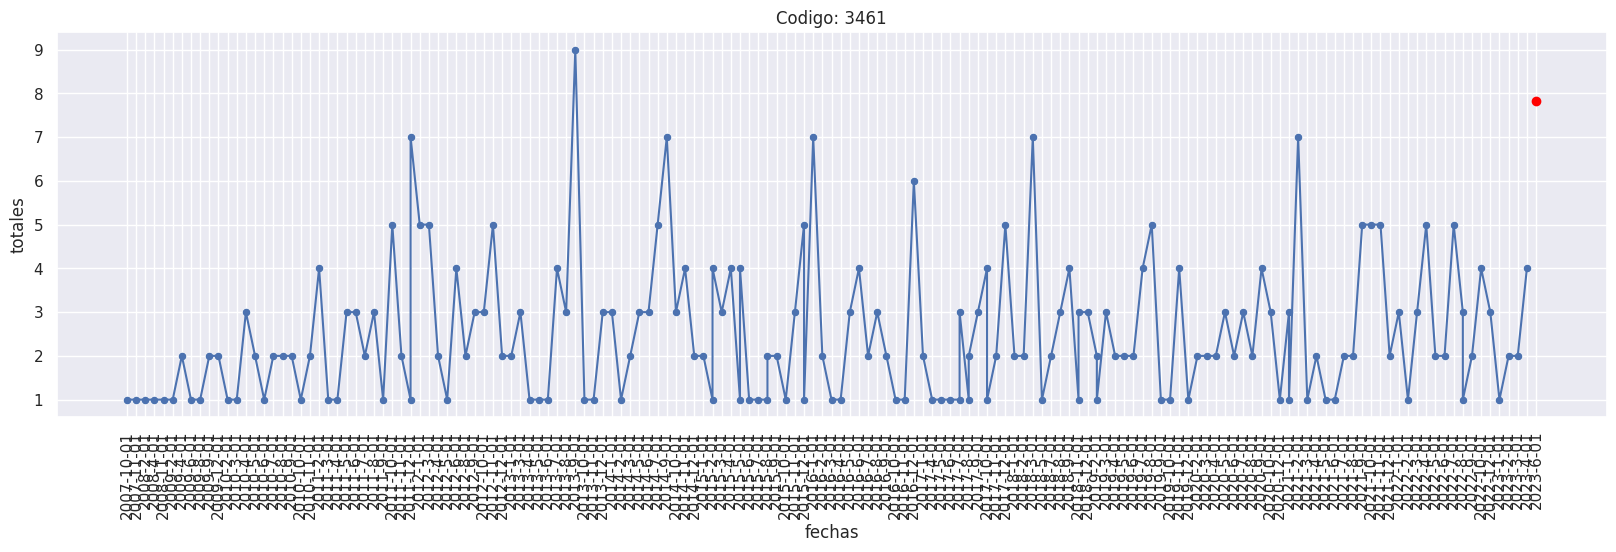

In [88]:
plt.figure(figsize=(20, 5))
sns.set(color_codes=True)
plt.xticks(rotation=90)
sns.scatterplot(x='fechas', y='totales', data=df_graf)
plt.scatter(x=(str(anio_in)+'-'+str(mes_in)+'-01'), y=pred, color='red')
plt.plot(df_graf.fechas, df_graf.totales)
plt.title("Codigo: "+codigo_in)
plt.show()